In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [8]:
classes = ["airplane", "automobile", "bird", "cat","dog", "deer", "frog", "horse", "ship", "truck"]

In [9]:
def plot_sample(x, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

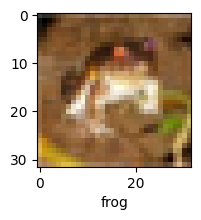

In [10]:
plot_sample(x_train, y_train, 0)

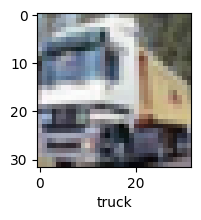

In [11]:
plot_sample(x_train, y_train, 1)

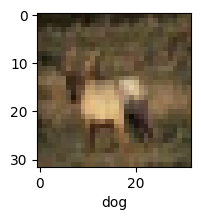

In [12]:
plot_sample(x_train, y_train, 3)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3043 - loss: 1.9316
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4204 - loss: 1.6488
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4556 - loss: 1.5441
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4747 - loss: 1.4938
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4929 - loss: 1.4405


In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.36      0.48      1000
           1       0.57      0.66      0.61      1000
           2       0.55      0.12      0.19      1000
           3       0.34      0.24      0.28      1000
           4       0.47      0.35      0.40      1000
           5       0.26      0.62      0.37      1000
           6       0.51      0.53      0.52      1000
           7       0.54      0.56      0.55      1000
           8       0.57      0.66      0.61      1000
           9       0.54      0.57      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [20]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3849 - loss: 1.6890
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5939 - loss: 1.1551
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6543 - loss: 0.9959
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6878 - loss: 0.9049
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7134 - loss: 0.8323
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7377 - loss: 0.7594
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7513 - loss: 0.7115
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7707 - loss: 0.6661
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7847 - loss: 0.6212
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7953 - loss: 0.5946


In [21]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7072 - loss: 0.8932


[0.9193947315216064, 0.7031000256538391]

In [23]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.0063755e-03, 7.6473784e-04, 3.2020605e-03, 8.9561588e-01,
        2.1429679e-04, 7.5667702e-02, 1.8720046e-02, 2.4270910e-05,
        4.7251843e-03, 5.9503818e-05],
       [3.6943187e-03, 2.1279337e-02, 2.7713929e-06, 1.2129560e-07,
        1.5334773e-08, 2.5649713e-09, 1.2184456e-09, 3.2129560e-10,
        9.7489387e-01, 1.2959402e-04],
       [2.5035298e-01, 2.1833123e-01, 1.0767315e-03, 1.1646158e-02,
        5.8988570e-03, 1.6029442e-03, 7.1666739e-04, 2.3889765e-03,
        4.2686397e-01, 8.1121467e-02],
       [9.1250962e-01, 7.3608691e-03, 2.2899073e-02, 1.4397677e-04,
        6.4301598e-03, 5.8486385e-05, 6.7509260e-05, 2.3056952e-04,
        5.0199084e-02, 1.0043178e-04],
       [1.5947079e-06, 8.0821246e-07, 7.7160909e-03, 6.3512988e-02,
        2.4980104e-01, 1.3404406e-02, 6.6555667e-01, 5.5943883e-06,
        7.7097593e-07, 5.0902442e-09]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[3]]